# Bobusa-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [verbreitung](#Verbreitung)
* [Appendix](#Appendix)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'BBS'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [91]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_art,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ,
           t_Obj.Zeichnung
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BBS%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [92]:
df['Anzahl'].sum()

198

In [93]:
# gezeichnete Funde
df.loc[df['Zeichnung'] != '']

,objID,ort_kurz,Ort,bef_art,bef_nr,ort_fluss,GE,Scherbe,Gewicht,Anzahl,Gr_Clist,Typ,Zeichnung
8,1257,MDB,Mandombe (Fpl. 259),Oberfl,87/101,Sangha,,R,14,1,70,BBS (?),x
16,1467,BBS,Bobusa (Fpl. 239),Schicht,87/2,Sangha,,B,32,1,70,BBS,x
132,6215,MBR,Maberu (Fpl. 235),Oberfl,87/101,Zaire/Kongo,,W,51,1,70,BDG/BBS (?),x
133,6217,MBR,Maberu (Fpl. 235),Oberfl,87/101,Zaire/Kongo,,W,55,1,70,BDG/BBS (?),x
137,6246,MBR,Maberu (Fpl. 235),Oberfl,87/101,Zaire/Kongo,,R,24,1,,BBS (?),x
140,6338,MIT,Mitula (Fpl. 251),Grube,87/103,Sangha,,W,26,1,70,BBS (?),None
141,6341,BBS,Bobusa (Fpl. 239),Schicht,87/2,Sangha,None,None,15,1,30,BBS,x


In [94]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,73,36.868687
GE,125,63.131313


In [95]:
a = pd.Series({'sicher':np.sum(df['Anzahl'].loc[~df['Typ'].str.contains("/| ")]),
               'fraglich':np.sum(df['Anzahl'].loc[df['Typ'].str.contains("/| ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,105,53.030303
sicher,93,46.969697


In [96]:
df.pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = np.sum, margins = True)

Typ
BBS             93.0
BBS (?)         99.0
BBS/BDG (?)      1.0
BBS/BOT (?)      1.0
BBS/EPE (?)      1.0
BBS/NGO (?)      1.0
BDG/BBS (?)      2.0
All            198.0
Name: Anzahl, dtype: float64

In [97]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl  Gewicht
ort_fluss     Ort                   bef_nr                 
Likwala-Esobe Boleko (Fpl. 285)     87/101       5      278
Sangha        Bobusa (Fpl. 239)     87/1        56      574
                                    87/101       2       57
                                    87/102       8      330
                                    87/2        54      483
              Bokonongo (Fpl. 250)  87/103       1       20
              Bonga (Fpl. 238)      87/101       6      253
                                    87/102      22      506
              Ikelemba (Fpl. 260)   87/101       1        9
              Loboko (Fpl. 248)     87/101       1       37
              Mandombe (Fpl. 259)   87/101       1       14
              Mitula (Fpl. 251)     87/102       2       16
                                    87/103       1       26
              Monjolomba (Fpl. 243) 87/101       1       19
              Ouesso (Fpl. 265)     87/102       1       34
              Sosolo (Fpl. 241)     87/101      11      227
Zaire/Kongo   Gombe (Fpl. 237)      87/101       1       24
              Lukolela (Fpl. 234)   87/101       6       87
              Maberu (Fpl. 235)     87/101       7      220
              Sungu (Fpl. 236)      87/101      11      314

In [98]:
# http://pandas.pydata.org/pandas-docs/stable/cookbook.html
df.ix[df['bef_art'].str.contains('Oberfl') == True, 'FEAT'] = 'Survey'
df.ix[~df['bef_art'].str.contains('Oberfl') == True, 'FEAT'] = 'Grabung'
df.ix[df['Typ'] == style, 'SICHERHEIT'] = 'sicher'
df.ix[df['Typ'].str.contains(' '), 'SICHERHEIT'] = 'fraglich'

In [99]:
a = pd.Series({'Grabungen':np.sum(df['Anzahl'].loc[~df['bef_art'].str.contains('Oberfl')]),
               'Surveyfunde':np.sum(df['Anzahl'].loc[df['bef_art'].str.contains('Oberfl')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Grabungen,111,56.060606
Surveyfunde,87,43.939394


In [107]:
df_pivot = df.pivot_table(values='objID', index='Gr_Clist', aggfunc=len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Pct'] = df_pivot['objID'] / df_pivot['objID'].sum() * 100
df_pivot

,objID,Pct
Gr_Clist,,
30,36,25.352113
70,88,61.971831
120,7,4.929577
,11,7.746479


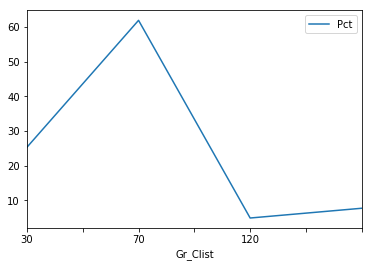

In [109]:
df_pivot['Pct'].plot()
plt.legend()

In [85]:
df_pivot = df.pivot_table(values='objID', index='Gr_Clist', columns='FEAT', aggfunc=len)
df_pivot['Grabung'] = df_pivot['Grabung'] / df_pivot['Grabung'].sum() * 100
df_pivot['Survey'] = df_pivot['Survey'] / df_pivot['Survey'].sum() * 100
df_pivot

FEAT,Grabung,Survey
Gr_Clist,,
30,44.262295,11.111111
70,54.098361,67.901235
120,1.639344,7.407407
,NaN,13.580247


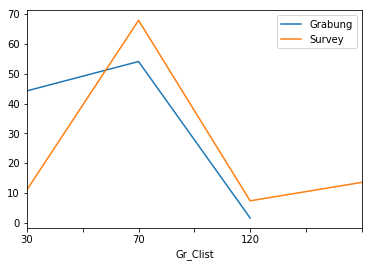

In [86]:
df_pivot['Grabung'].plot()
df_pivot['Survey'].plot()
plt.legend()

## Scherbentypen

In [87]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
#df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,1,0.507614
R,73,37.055838
W,121,61.421320
B,2,1.015228


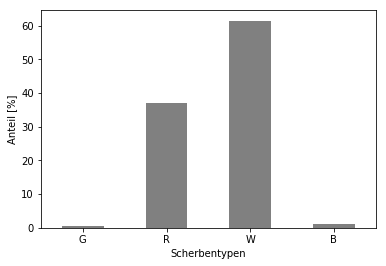

In [88]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale

In [110]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df1 = df.dropna(subset = ['Fabric'])
df1['Fabric'] = df1['Fabric'].map(lambda x: x.rstrip(' (?)'))
df1['Fabric'] = df1['Fabric'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


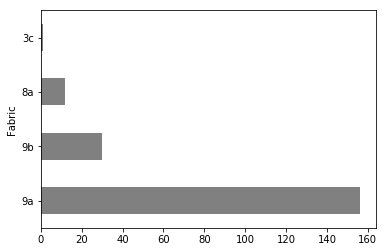

In [111]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [112]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
9a,156,78.391960
9b,30,15.075377
8a,12,6.030151
3c,1,0.502513


In [114]:
a = pd.Series({'9':np.sum(df['Anzahl'].loc[df['Fabric'].str.contains("9")]),
               'Nicht 9':np.sum(df['Anzahl'].loc[~df['Fabric'].str.contains("9")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
9,186,93.467337
Nicht 9,13,6.532663


In [115]:
# Orte mit Ausnahmen:
a = df.loc[~df['Fabric'].str.contains("9")]
a.pivot_table(values = 'objID', index = ['ort_fluss', 'Ort'], aggfunc = len)

ort_fluss  Ort                 
Sangha     Bobusa (Fpl. 239)       6
           Bokonongo (Fpl. 250)    1
           Bonga (Fpl. 238)        5
           Sosolo (Fpl. 241)       1
Name: objID, dtype: int64

In [116]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,1,0.826446
wenig,5,4.132231
mittel,16,13.223140
viel,54,44.628099
sehr viel,45,37.190083


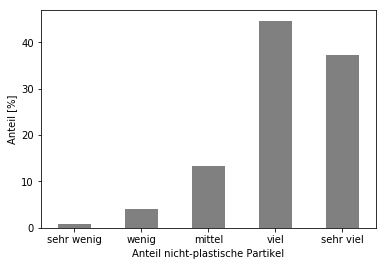

In [117]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [118]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,3.0,2.521008
F,NaN,NaN
M,9.0,7.563025
C,51.0,42.857143
VC,56.0,47.058824


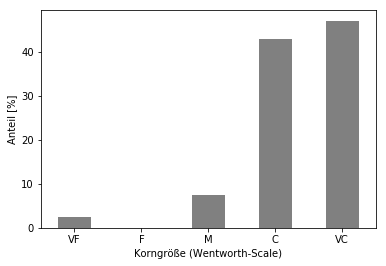

In [119]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [120]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
Schamott,103,85.123967
S/Schamott,11,9.090909
Schamott/Org,2,1.652893
Org/Laterit/Schamott,1,0.826446
S,1,0.826446
S/Gl/Org,1,0.826446
S/Gl/Schamott,1,0.826446
S/Schamott (?),1,0.826446


In [121]:
a = pd.Series({'Schamott':np.sum(df['Anzahl'].loc[df['MagerungArt'].str.contains("Schamott")]),
               'Nicht Schamott':np.sum(df['Anzahl'].loc[~df['MagerungArt'].str.contains("Schamott")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Nicht Schamott,45,22.613065
Schamott,154,77.386935


### Brennfarbe

In [122]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,29,18.012422
Sonstig,38,23.602484
Weiß,94,58.385093


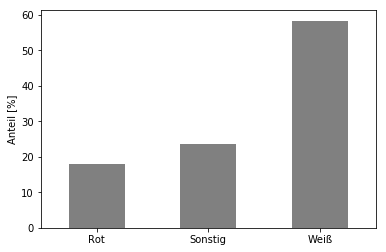

In [123]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [124]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

        82
g       25
        23
s       10
bg       8
g s      2
g        2
bg g     2
 s       1
 g       1
dtype: int64

### Oberfläche der Scherben

In [125]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
"abgebröckelt, rau",1,0.833333
außen glatt/innen rau,2,1.666667
außen leicht rau/innen glatt,1,0.833333
glatt,41,34.166667
glatt/leicht rau,1,0.833333
glatt/poliert,1,0.833333
glatt/seifig,1,0.833333
gleicht rau,1,0.833333
leicht rau,44,36.666667


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


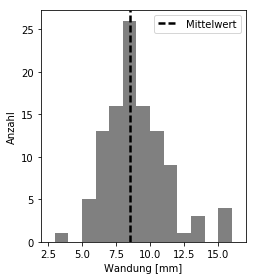

In [127]:
sql = """SELECT
           t_Obj.objID,
           t_obj.Form_Gef,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

ax = df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
#plt.gca().set_aspect(.25)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1]) - 2) / (abs(ylim[0]) + abs(ylim[1])))
plt.xlabel("Wandung [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.savefig('../output/figs/3-1-2-1_PIKMUN_Wanddicke_insg.pdf', bbox_inches='tight')
plt.show()

In [128]:
df['Wandung'].describe()

count    107.000000
mean       8.514019
std        2.299977
min        3.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       16.000000
Name: Wandung, dtype: float64

In [129]:
df['Wandung'].var()

5.289895961911481

## Gefäßformen

In [130]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [131]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,34,75.555556
sicher,11,24.444444


In [132]:
a[0].sum()

45

In [133]:
# alles fragliche einfach abschneiden und nur 1. Variante behalten:
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Gef'] = df['Form_Gef'].apply(lambda x: x.split('/')[0])

In [134]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


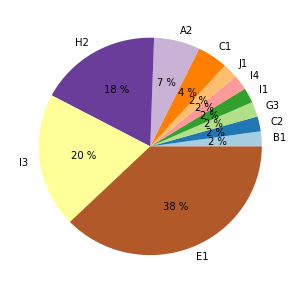

In [135]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


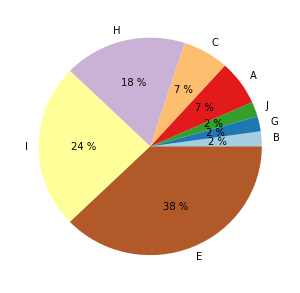

In [136]:
# alles hinter der 1. Stelle abschneiden, um nur die Grundform zu haben
df['Form_Gef_GR'] = df['Form_Gef'].map(lambda x: str(x)[:1])

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef_GR', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [137]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['maxD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

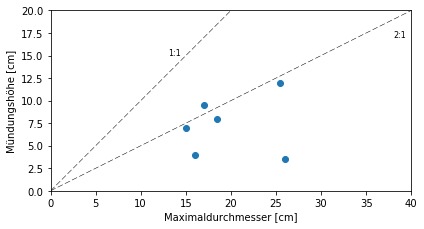

In [148]:
fig = plt.figure(1)
#fig.set_size_inches(10,10)

ax = plt.subplot(111)

plt.scatter(df['maxD'], df['muendungsH'])
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,50],[0, 10,20,50], color='black', linestyle = '--', linewidth=0.5)
ax.text(13, 15, '1:1', color='black', fontsize=8)

ax.plot([0, 10,20,50],[0, 5,10,25], color='black', linestyle = '--', linewidth=0.5)
ax.text(38, 17, '2:1', color='black', fontsize=8)

plt.xlim(0,40) 
plt.ylim(0,20) 

ax.set_aspect('equal')
plt.tight_layout()

#plt.savefig('../output/figs/3-1-2-2_Ngombe_Keramik-Proportionen.pdf', bbox_inches='tight')
plt.show()

In [138]:
a = df.loc[df['Form_Gef'].str.contains("C|E")] 
b = df.loc[df['Form_Gef'].str.contains("I|H")] 

In [139]:
a.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,13.000000,3.000000,18.000000,3.000000,11.0000,3.000000,0.0,3.000000,13.000000,11.0
mean,16.346154,8.166667,15.083333,6.666667,18.0000,4.833333,NaN,2.081610,1.091120,1.0
std,5.293017,1.258306,5.943979,0.577350,5.8438,0.763763,NaN,0.266838,0.049481,0.0
min,11.000000,7.000000,6.000000,6.000000,11.0000,4.000000,NaN,1.789474,1.031250,1.0
25%,13.000000,7.500000,11.250000,6.500000,15.0000,4.500000,NaN,1.966165,1.057143,1.0
50%,14.500000,8.000000,14.000000,7.000000,17.0000,5.000000,NaN,2.142857,1.083333,1.0
75%,18.000000,8.750000,17.125000,7.000000,17.7500,5.250000,NaN,2.227679,1.120000,1.0
max,29.000000,9.500000,26.000000,7.000000,31.0000,5.500000,NaN,2.312500,1.208333,1.0


In [140]:
b.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,16.00000,3.000000,6.000000,2.00000,6.000000,2.000000,1.0,2.000000,5.000000,6.0
mean,20.59375,6.166667,19.083333,2.25000,21.083333,5.750000,0.0,3.062500,0.982156,1.0
std,3.79130,5.107184,4.454399,1.06066,4.005205,3.889087,NaN,1.325825,0.084405,0.0
min,16.00000,2.500000,14.000000,1.50000,16.000000,3.000000,0.0,2.125000,0.900000,1.0
25%,16.87500,3.250000,16.125000,1.87500,18.500000,4.375000,0.0,2.593750,0.954545,1.0
50%,20.50000,4.000000,18.250000,2.25000,20.500000,5.750000,0.0,3.062500,0.961538,1.0
75%,24.00000,8.000000,21.500000,2.62500,24.375000,7.125000,0.0,3.531250,0.969697,1.0
max,26.00000,12.000000,26.000000,3.00000,26.000000,8.500000,0.0,4.000000,1.125000,1.0


In [154]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz)='BGA')
           AND ((t_Komplex.bef_nr) = '87/101')
           AND ((t_Obj.Individuum) = '2, 6, 9, 10'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']

df

,Ind,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,Form_Gef,maxD-muendH
0,"BGA 87/101:2, 6, 9, 10",23,12,,,25.5,8.5,,H2,2.125


## Randformen

In [166]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like 'NGO%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M1,12,46.153846
M2,9,34.615385
M5,4,15.384615
M3,1,3.846154


In [167]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1.1,11,36.666667
B1.5,10,33.333333
B1,5,16.666667
A1.1,1,3.333333
A2,1,3.333333


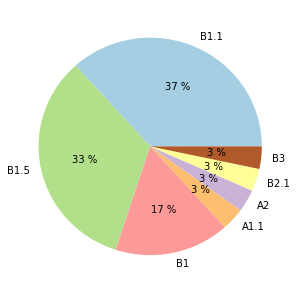

In [168]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [170]:
df_pivot['objID'].sum()

30

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


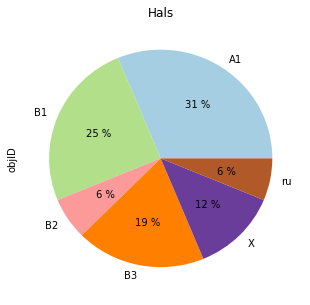

In [161]:
a = df.dropna(subset = ['Form_Hals'])
a['Form_Hals'] = a['Form_Hals'].map(lambda x: str(x)[:2])

df_pivot = a.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


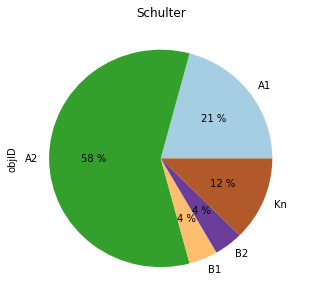

In [162]:
b = df.dropna(subset = ['Form_Schulter'])
b['Form_Schulter'] = b['Form_Schulter'].map(lambda x: str(x)[:2])

df_pivot = b.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

### Boden

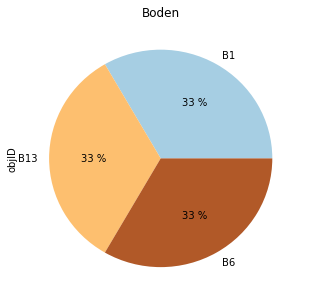

In [164]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# Fragezeichen löschen
df['Form_Boden'] = df['Form_Boden'].map(lambda x: x.rstrip(' (?)'))
df['Form_Boden'] = df['Form_Boden'].apply(lambda x: x.split('/')[0])\

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
#df_pivot

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Boden")

In [165]:
len(df['Form_Boden'])

3

## Verzierungen

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


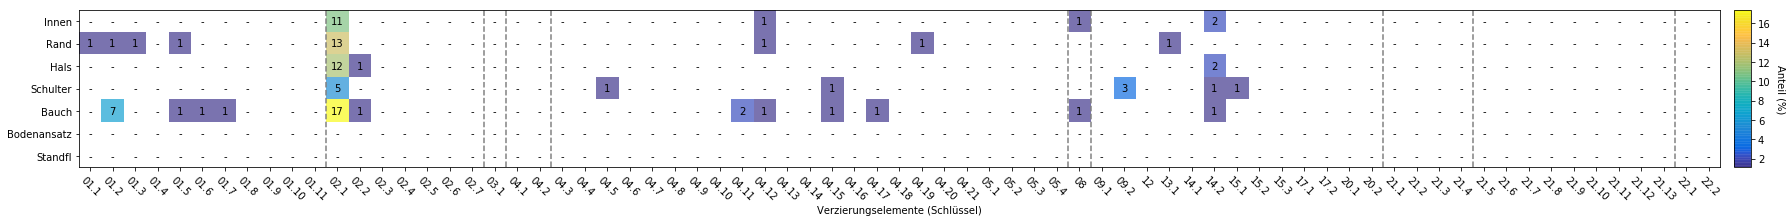

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-4_Bobusa_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [173]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,78,54.545455
verziert,65,45.454545


In [174]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzName_alt,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

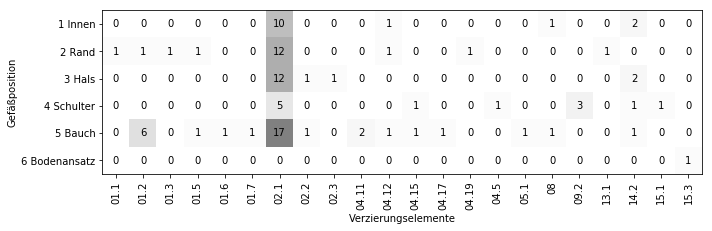

In [175]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
#plt.savefig('../output/figs/3-1-2-10_Mbenja_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [176]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


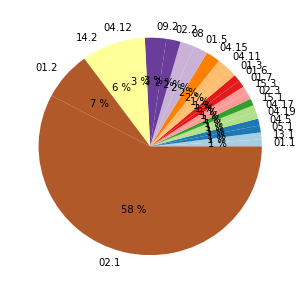

In [177]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [178]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot['Prozent'] = df_pivot["objID"]/df_pivot["objID"].sum()*100
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = False)
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
pos,,
5 Bauch,35,36.082474
2 Rand,19,19.587629
3 Hals,16,16.494845
1 Innen,14,14.432990
4 Schulter,12,12.371134
6 Bodenansatz,1,1.030928


In [179]:
a = pd.Series({'Riefen/Rillen':len(df.loc[df['verzName'].str.contains("01|02")].index),
               'Sonst.':len(df.loc[~df['verzName'].str.contains("01|02")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Riefen/Rillen,72,74.226804
Sonst.,25,25.773196


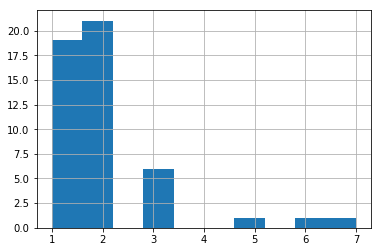

In [182]:
a = df.pivot_table(values = 'verzName', index = 'objID', aggfunc = len)
a.hist()

In [183]:
a.describe()

count    49.000000
mean      1.979592
std       1.249830
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       7.000000
Name: verzName, dtype: float64

## Verbreitung

In [33]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
3,Lukolela (Fpl. 234),234,17.175593,-1.062185,BBS
8,Maberu (Fpl. 235),235,17.257014,-1.069018,BBS (?)
5,Sungu (Fpl. 236),236,17.334786,-1.033313,BBS
4,Gombe (Fpl. 237),237,17.580406,-0.704069,BBS (?)
2,Bonga (Fpl. 238),238,16.873263,-1.117121,BBS
0,Bobusa (Fpl. 239),239,16.917098,-1.052349,BBS
4,Sosolo (Fpl. 241),241,17.128605,-0.892241,BBS
11,Monjolomba (Fpl. 243),243,17.174576,-0.684421,BBS (?)
6,Loboko (Fpl. 248),248,17.130913,-0.109189,BBS (?)
1,Bokonongo (Fpl. 250),250,17.129437,0.201971,BBS (?)


In [34]:
df.to_csv("../data/processed/3-1-2-4_BBS_Verbreitung.csv", index = False)

In [35]:
len(df)

15

In [36]:
df.pivot_table(values = 'Ort', index = 'TYP', aggfunc = len)

TYP
BBS        6
BBS (?)    9
Name: Ort, dtype: int64

## Tafeln

In [89]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Scherbe,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Scherbe,Form_Gef,Form_Rand,Form_Boden
0,28,3,MBR,87/101,NaN,22,BBS (?),R,E1 (?),B1/B3,None
1,30,5,MBR,87/101,NaN,96,BDG/BBS (?),W,C1 (?),None,None
2,31,5,MBR,87/101,NaN,111,BDG/BBS (?),W,C2 (?),None,None
3,32,2,SUN,87/101,NaN,63,BBS (?),W,B1 (?),None,None
4,33,5,BGA,87/101,10,"2, 6, 9, 10",BBS,G,H2,C3,None
5,33,10,BGA,87/102,NaN,7,BBS,R,E1,B1/B2,None
6,33,11,BGA,87/102,5,"5, 37-38",BBS,R,None,A1,None
7,33,12,BBS,87/1,NaN,-2:1,BBS,W,None,None,None
8,33,13,BBS,87/1,NaN,5,BBS,None,None,None,None
9,33,16,BBS,87/2,NaN,"-5:6,17",BBS,B,None,None,B6
